In [413]:
import pandas as pd
import numpy as np

In [414]:
df=pd.read_csv(r"C:\Users\MY BOOK\OneDrive\Documents\Data analytics\datasets\healthcare-dataset-stroke-data.csv")

In [415]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [416]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [417]:
df_orig=df.copy()

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Preprocessing

In [419]:
df=df.drop(['id', 'ever_married'], axis=1)

In [420]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [421]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [422]:
df=df[df['gender']!='Other']

In [423]:
df['gender']=df['gender'].map({'Male':1, 'Female':0})

In [424]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The BMI column has missing values. Instead of dropping those rows, we proceed to fill those blanks using KNN

Since there is only a single observation with gender equal to 'other', we drop it

In [425]:
df1=df[['age','gender', 'bmi']]

In [426]:
#from sklearn.preprocessing import StandardScaler

#scaler=StandardScaler()

#df1[['age','gender']]=scaler.fit_transform(df1[['age','gender']])

In [427]:
df1

,age,gender,bmi
0,67.0,1,36.6
1,61.0,0,NaN
2,80.0,1,32.5
3,49.0,0,34.4
4,79.0,0,24.0
...,...,...,...
5105,80.0,0,NaN
5106,81.0,0,40.0
5107,35.0,0,30.6
5108,51.0,1,25.6


In [428]:
df_m=df1[df1['bmi'].isnull()]
x=df1[~df1['bmi'].isnull()]
y=x['bmi']
x=x.drop('bmi', axis=1)

In [429]:
from sklearn.neighbors import KNeighborsRegressor

kmodel=KNeighborsRegressor(n_neighbors=4).fit(x,y)
pred=kmodel.predict(df_m[['age','gender']])

In [430]:
df.loc[df_m.index, 'bmi']=pred

In [431]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Exploratory Data Analysis

Now lets check how age affects the chance for a stroke. Similarly, find the relation between gender and BMI with stroke

This investigation can be done using data visualizations.

In [432]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')

In [433]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:xlabel='stroke', ylabel='age'>

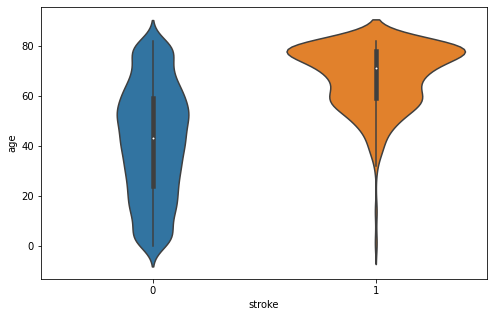

In [434]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,  y='age', x='stroke')


We can easily conclude from the viz that the risk of stroke increases with age

invalid value encountered in longlong_scalars


Text(0, 0.5, 'Rate')

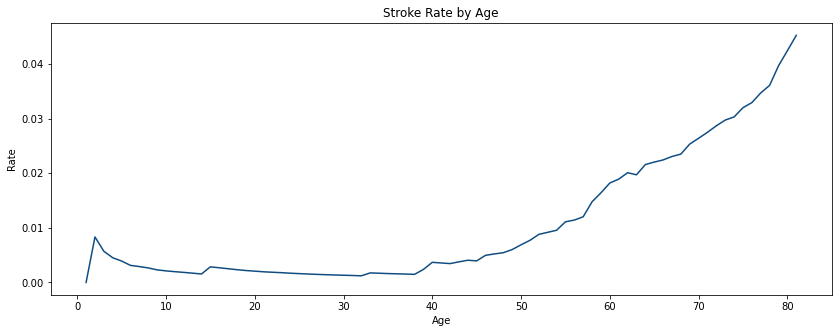

In [435]:
df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))
    
   
plt.figure(figsize=(14,5))
sns.lineplot(data=rate,color='#0f4c81')
plt.title('Stroke Rate by Age') 
plt.xlabel('Age')
plt.ylabel('Rate')

This plot visualises the how the chance of stroke increases with age.

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

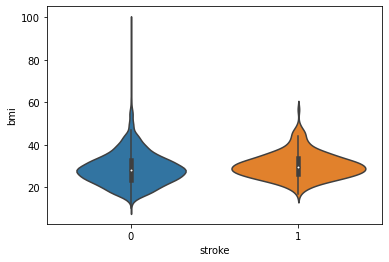

In [436]:
sns.violinplot(data=df, x='stroke',  y='bmi')


Only a slight difference is seen in the violinplots.

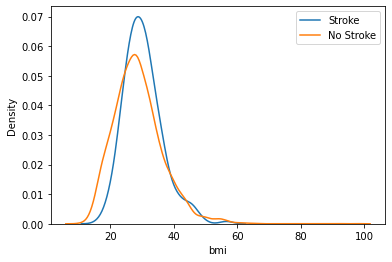

In [437]:
df_stroke=df[df['stroke']==1]
df_nostroke=df[df['stroke']!=1]

sns.kdeplot(df_stroke['bmi'], label='Stroke')
sns.kdeplot(df_nostroke['bmi'], label='No Stroke')

plt.legend()
plt.show()

From the above plot, a slight increase in bmi is observed in the category with stroke.

The following plot gives the distribution of average glucose levels in both the categories

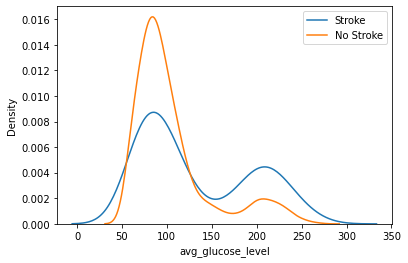

In [438]:
sns.kdeplot(df_stroke['avg_glucose_level'], label='Stroke')
sns.kdeplot(df_nostroke['avg_glucose_level'], label='No Stroke')
plt.legend()
plt.show()

No relation is visible in the above plot.

Now to check whether gender and stroke have some relation, we do a chi-square test

In [439]:
import scipy.stats as stats

crosstab = pd.crosstab(df['gender'], df['stroke'])
chi2, p_value, _, _ = stats.chi2_contingency(crosstab)

print("Gender - p-value:", p_value)

crosstab = pd.crosstab(df['Residence_type'], df['stroke'])
chi2, p_value, _, _ = stats.chi2_contingency(crosstab)


print("Residence type - p-value:", p_value)

Gender - p-value: 0.5598277580669416
Residence type - p-value: 0.29982523877153633


High p-value, so we can conclude that gender and residence type doesn't influence chance for stroke

In [440]:
crosstab = pd.crosstab(df['work_type'], df['stroke'])
chi2, p_value, _, _ = stats.chi2_contingency(crosstab)

print("Work type- p-value:", p_value)

Work type- p-value: 5.40903546949726e-10


Small p-value, so we can conclude that work type has an influence on chance of stroke 

In [441]:
df=df.drop(['gender', 'Residence_type'], axis=1)

# Model Development

In [442]:
df

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,0,1,Private,228.69,36.60,formerly smoked,1
1,61,0,0,Self-employed,202.21,29.10,never smoked,1
2,80,0,1,Private,105.92,32.50,never smoked,1
3,49,0,0,Private,171.23,34.40,smokes,1
4,79,1,0,Self-employed,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...
5105,80,1,0,Private,83.75,24.75,never smoked,0
5106,81,0,0,Self-employed,125.20,40.00,never smoked,0
5107,35,0,0,Self-employed,82.99,30.60,never smoked,0
5108,51,0,0,Private,166.29,25.60,formerly smoked,0


In [443]:
from sklearn.preprocessing import StandardScaler

# Three numerical columns will be scaled using standard scaler
scaler=StandardScaler()
df[['age','avg_glucose_level', 'bmi']]=scaler.fit_transform(df[['age','avg_glucose_level', 'bmi']])

In [444]:
df

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.050758,0,1,Private,2.706450,0.986771,formerly smoked,1
1,0.785653,0,0,Self-employed,2.121652,0.020723,never smoked,1
2,1.625151,0,1,Private,-0.004867,0.458665,never smoked,1
3,0.255444,0,0,Private,1.437473,0.703397,smokes,1
4,1.580967,1,0,Self-employed,1.501297,-0.636190,never smoked,1
...,...,...,...,...,...,...,...,...
5105,1.625151,1,0,Private,-0.494481,-0.539585,never smoked,0
5106,1.669335,0,0,Self-employed,0.420922,1.424713,never smoked,0
5107,-0.363133,0,0,Self-employed,-0.511266,0.213932,never smoked,0
5108,0.343813,0,0,Private,1.328375,-0.430100,formerly smoked,0


In [445]:
# Two categorical columns will be replaced with dummy variables

columns_to_encode = ['work_type', 'smoking_status']

df_encoded = pd.get_dummies(df, columns=columns_to_encode)

In [446]:
df_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.050758,0,1,2.706450,0.986771,1,0,0,1,0,0,0,1,0,0
1,0.785653,0,0,2.121652,0.020723,1,0,0,0,1,0,0,0,1,0
2,1.625151,0,1,-0.004867,0.458665,1,0,0,1,0,0,0,0,1,0
3,0.255444,0,0,1.437473,0.703397,1,0,0,1,0,0,0,0,0,1
4,1.580967,1,0,1.501297,-0.636190,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.625151,1,0,-0.494481,-0.539585,0,0,0,1,0,0,0,0,1,0
5106,1.669335,0,0,0.420922,1.424713,0,0,0,0,1,0,0,0,1,0
5107,-0.363133,0,0,-0.511266,0.213932,0,0,0,0,1,0,0,0,1,0
5108,0.343813,0,0,1.328375,-0.430100,0,0,0,1,0,0,0,1,0,0


In [447]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE

In [448]:
x=df_encoded.drop('stroke', axis=1)
y=df_encoded['stroke']

In [449]:
train_x,  test_x, train_y, test_y=train_test_split(x,y, test_size=0.3,random_state=10)

In [459]:
y.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [450]:
# Since the data set is highly imbalanced in favour of no-stroke class, we will use SMOTE.

smote=SMOTE(random_state=20)
train_xsmote, train_ysmote=smote.fit_resample(train_x, train_y)

Lets model RandomForest, LogisticRegression, SVM and AdaBoost for classification and determine their F1 scores

In [451]:
rf_model=RandomForestClassifier(criterion='gini', n_estimators=10)
rf_cv_scores = cross_val_score(rf_model, train_xsmote, train_ysmote, cv=5, scoring='f1' )
print('RF score', rf_cv_scores.mean())

lr_model=LogisticRegression()
lr_cv_scores = cross_val_score(lr_model, train_xsmote, train_ysmote, cv=5, scoring='f1' )
print('LR score',lr_cv_scores.mean())


svc_model=SVC(kernel='rbf')
svc_cv_scores = cross_val_score(svc_model, train_xsmote, train_ysmote, cv=5, scoring='f1' )
print('SVC score',svc_cv_scores.mean())

ab_model = AdaBoostClassifier(n_estimators=20)
ab_cv_scores = cross_val_score(ab_model, train_xsmote, train_ysmote, cv=5, scoring='f1' )
print('AB score',ab_cv_scores.mean())

RF score 0.9187464323595517
LR score 0.8098083002038949
SVC score 0.8523326433419951
AB score 0.802692225681788


Observe that RandomForest performed the best here, now lets check how they perform on the unseen test data 

In [452]:
rf_model=RandomForestClassifier(criterion='gini', n_estimators=50).fit(train_xsmote, train_ysmote)
pred=rf_model.predict(test_x)
print('Accuracy of the RandomForest model: ',accuracy_score(test_y, pred))
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))

lr_model=LogisticRegression().fit(train_xsmote, train_ysmote)
pred=lr_model.predict(test_x)
print('Accuracy of the LogisticRegression model: ', accuracy_score(test_y, pred))
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))


svc_model=SVC(kernel='rbf').fit(train_xsmote, train_ysmote)
pred=svc_model.predict(test_x)
print('Accuracy of the svc model: ', accuracy_score(test_y, pred))
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))

ab_model = AdaBoostClassifier(n_estimators=20).fit(train_xsmote, train_ysmote)
pred=ab_model.predict(test_x)
print('Accuracy of the AdadBoost model: ', accuracy_score(test_y, pred))
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))

Accuracy of the RandomForest model:  0.8930202217873451
[[1351  102]
 [  62   18]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1453
           1       0.15      0.23      0.18        80

    accuracy                           0.89      1533
   macro avg       0.55      0.58      0.56      1533
weighted avg       0.91      0.89      0.90      1533

Accuracy of the LogisticRegression model:  0.7886497064579256
[[1156  297]
 [  27   53]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1453
           1       0.15      0.66      0.25        80

    accuracy                           0.79      1533
   macro avg       0.56      0.73      0.56      1533
weighted avg       0.93      0.79      0.84      1533

Accuracy of the svc model:  0.8193085453359426
[[1213  240]
 [  37   43]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90  

Observe that though Randomforest performed the best in terms of score, it performed poorly in terms of precision and recall of the 1 class. Logistic Regression and AdaBoost models gave beter recall rate. 

The developed models are mostly very good in identifying a no-stroke observation. They perform poorly in predicting stroke, by misclassifying too many no-stroke cases as stroke cases.
While predicting diseases, misclassifying a positive case as negative is more dangerous than misclassifying a negative case as positive. But insisting on identifying all positive cases will produce too many false positives, which again is not recommended.  We should try for the balance between the two approaches.


Logistic Regression had one of the highest f1 score, so lets use gridsearch to tune that for better results.

In [453]:
p = ['l1','l2']
C = [0.001, 0.01, 0.1, 1,5, 10,50] 

lr_param_grid = {'penalty': p, 'C': C}
lr_model = LogisticRegression( max_iter=500, solver='liblinear')
grid = GridSearchCV(lr_model, lr_param_grid, cv=5)

grid.fit(train_xsmote, train_ysmote)
best_params=grid.best_params_
print(best_params)

{'C': 50, 'penalty': 'l1'}


In [454]:
# Here we evaluate the performance of the best LogisticRegression model returned by gridseaarch
best_model=grid.best_estimator_

pred=best_model.predict(test_x)
print('Accuracy Score: ', accuracy_score(test_y,pred))
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))


Accuracy Score:  0.7932159165035877
[[1163  290]
 [  27   53]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1453
           1       0.15      0.66      0.25        80

    accuracy                           0.79      1533
   macro avg       0.57      0.73      0.57      1533
weighted avg       0.93      0.79      0.85      1533



Thus with hyperparameter tuning, the Logisitc Regression model returns a model which is much better than Random Forest's in terms of recall.
Further, we can maniupulate the threshold value that the model uses in classification.

Let's try that...

In [455]:
lr_model = LogisticRegression(solver='liblinear', C=50, penalty='l1').fit(train_xsmote, train_ysmote)

probabilities = lr_model.predict_proba(test_x)[:, 1] # 1 class predictions

for threshold in [0.25, 0.3,.35,0.4, .45]:
    pred = (probabilities >= threshold).astype(int)
    print('Accuracy Score: ', accuracy_score(test_y,pred))
    print(confusion_matrix(test_y, pred))
    print(classification_report(test_y, pred))
    print(f"Threshold: {threshold}")
    
  

Accuracy Score:  0.6457925636007827
[[916 537]
 [  6  74]]
              precision    recall  f1-score   support

           0       0.99      0.63      0.77      1453
           1       0.12      0.93      0.21        80

    accuracy                           0.65      1533
   macro avg       0.56      0.78      0.49      1533
weighted avg       0.95      0.65      0.74      1533

Threshold: 0.25
Accuracy Score:  0.690150032615786
[[989 464]
 [ 11  69]]
              precision    recall  f1-score   support

           0       0.99      0.68      0.81      1453
           1       0.13      0.86      0.23        80

    accuracy                           0.69      1533
   macro avg       0.56      0.77      0.52      1533
weighted avg       0.94      0.69      0.78      1533

Threshold: 0.3
Accuracy Score:  0.7201565557729941
[[1036  417]
 [  12   68]]
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1453
           1       0.14   

Threshold value of 0.35 seems to perform well in terms of recall.

Now we proceed with tuning the Adaboost classifier using GridsearchCV. A custom function will be used for scoring such that we get the best model which gives high recall for the positive(stroke) class.

In [456]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

param_grid = {'n_estimators': [5, 10,20,50], 'learning_rate': [ 0.1, 0.01, 0.001]}

def custom_recall_class1(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=1)

s=make_scorer(custom_recall_class1)
#s = make_scorer(f1_score)


grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, scoring=s)
grid.fit(train_xsmote, train_ysmote)


best_params = grid.best_params_
best_model=grid.best_estimator_
print(best_params)

pred=best_model.predict(test_x)
print('Accuracy Score: ', accuracy_score(test_y,pred))
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))

{'learning_rate': 0.01, 'n_estimators': 10}
Accuracy Score:  0.6223091976516634
[[881 572]
 [  7  73]]
              precision    recall  f1-score   support

           0       0.99      0.61      0.75      1453
           1       0.11      0.91      0.20        80

    accuracy                           0.62      1533
   macro avg       0.55      0.76      0.48      1533
weighted avg       0.95      0.62      0.72      1533



The model with parameters: {'learning_rate': 0.01, 'n_estimators': 10} works very well in not missing much positive cases, but at the same time returns too many false positives. Lets try using f1 score instead of class specific recall for scoring:

In [457]:
param_grid = {'n_estimators': [5, 10,20,50], 'learning_rate': [ 0.1, 0.01, 0.001]}

#def custom_recall_class1(y_true, y_pred):
#    return recall_score(y_true, y_pred, pos_label=1)

#s=make_scorer(custom_recall_class1)
s = make_scorer(f1_score)


grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, scoring=s)
grid.fit(train_xsmote, train_ysmote)


best_params = grid.best_params_
best_model=grid.best_estimator_
print(best_params)

pred=best_model.predict(test_x)
print('Accuracy Score: ', accuracy_score(test_y,pred))
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))

{'learning_rate': 0.1, 'n_estimators': 50}
Accuracy Score:  0.7273320287018917
[[1049  404]
 [  14   66]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1453
           1       0.14      0.82      0.24        80

    accuracy                           0.73      1533
   macro avg       0.56      0.77      0.54      1533
weighted avg       0.94      0.73      0.80      1533



Increasing the number of estimators to 50 returned a more balanced model. Further, lets try some manual tuning:

In [458]:
# Here we set n_estimators=33, learning_rate=0.2

ab_model = AdaBoostClassifier(n_estimators=33, learning_rate=0.2).fit(train_xsmote, train_ysmote)
pred=ab_model.predict(test_x)

print('Accuracy of the AdaBoost model: ', accuracy_score(test_y, pred))
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))    

Accuracy of the AdaBoost model:  0.7325505544683627
[[1057  396]
 [  14   66]]
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1453
           1       0.14      0.82      0.24        80

    accuracy                           0.73      1533
   macro avg       0.56      0.78      0.54      1533
weighted avg       0.94      0.73      0.81      1533



Setting n_estimators=33 and learning_rate=0.2 returned a model with high recall and moderate accuracy.

Model Metrics

Random Forest      :   Accuracy= 0.89   ,  Stroke class specific Recall= 0.20 

Logistic Regression:   Accuracy= 0.72   ,  Stroke class specific Recall= 0.85

Ada Boost          :   Accuracy= 0.73   ,  Stroke class specific Recall= 0.82

In summary, it is important to select the appropriate model based on the requirements. In my view, having a few false positives is preferable to having many false negatives.

# Explanation using SHAP

Initially, we generate a SHAP waterfall chart to examine the importance of different features. Subsequently, we utilize a beeswarm plot to visually represent the impact of each feature on the classification.

TreeExplainer in SHAP is incomparably fater than KernelExplainer. The best models trained earlier were Logistic Regression and Adaboost, both not compatible with the TreeExplainer. Therefore, we train a RandomForest model to be explained using SHAP.

In [460]:
# Pre-processing

df_orig=df_orig.drop(['id', 'ever_married','gender', 'Residence_type'], axis=1)

scaler=StandardScaler()
df_orig[['age','avg_glucose_level', 'bmi']]=scaler.fit_transform(df_orig[['age','avg_glucose_level', 'bmi']])

df_orig['work_type']=df_orig['work_type'].map({'children':-2,'Never_worked':-1,'Govt_job':0,'Self-employed':1,'Private':2})
df_orig['smoking_status']=df_orig['smoking_status'].map({'never smoked':-1,'Unknown':0,'formerly smoked':1,'smokes':2})
df_orig=df_orig.dropna(axis=0)


In [461]:
x=df_orig.drop('stroke', axis=1)
y=df_orig['stroke']

train_x,  test_x, train_y, test_y=train_test_split(x,y, test_size=0.3,random_state=10)

smote=SMOTE(random_state=20)
train_xsmote, train_ysmote=smote.fit_resample(train_x, train_y)

In [462]:
# Training the tree based model and checking its performance

rf_model1=RandomForestClassifier(criterion='gini', n_estimators=40, max_depth=5,min_samples_split=10,min_samples_leaf=8).fit(train_xsmote, train_ysmote)
pred=rf_model1.predict(test_x)
print('Accuracy Score: ', accuracy_score(test_y,pred))
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))


Accuracy Score:  0.723693143245078
[[1021  391]
 [  16   45]]
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1412
           1       0.10      0.74      0.18        61

    accuracy                           0.72      1473
   macro avg       0.54      0.73      0.51      1473
weighted avg       0.95      0.72      0.81      1473



In [463]:
# SHAP 

explainer = shap.TreeExplainer(rf_model1)

shap_values = explainer.shap_values(test_x)

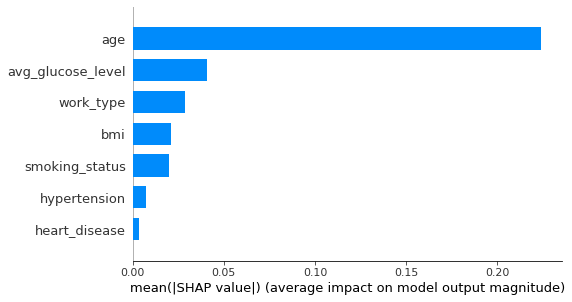

In [465]:
# The SHAP summary Waterplot
shap.summary_plot(shap_values[1], test_x, plot_type="bar")

Observe that Age, avg glucose level and work-type are the features that influence the classification the most. Surprisingly, hypertension and heart disease are affecting the least.

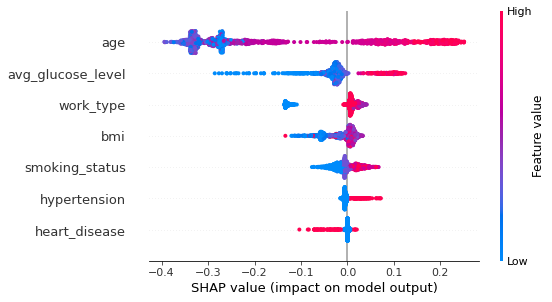

In [464]:
# The SHAP summary plot
shap.summary_plot(shap_values[1], test_x, plot_type="dot")

It is evident that an increase in age has a positive correlation with the chance of experiencing a stroke. Moreover, a higher average glucose level also contributes to an increased chance of stroke. As anticipated, both smoking and hypertension have a positive influence on the likelihood of stroke. Additionally, a higher body mass index (BMI) seems to be associated with an increased chance of stroke.
Interestingly, contrary to expectations, the presence of heart disease does not appear to have a positive impact on the occurrence of stroke.